# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Loading the dataset:

In [2]:
df=pd.read_csv(r"F:\DHIVYA\DATA SCIENCE\MACHINE LEARNING\ML projects\DATASETS\Automobile(car) Price Prediction\Automobile data.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Analysing:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.shape

(205, 26)

In [6]:
# Categorical_Columns:
Categorical_columns=[col for col in df if df[col].dtypes in ('O','Object')]
print("No. of Categorical_columns:",len(Categorical_columns))
print("Categorical Columns:",Categorical_columns)

No. of Categorical_columns: 10
Categorical Columns: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [7]:
#Numerical_Columns:
Numerical_columns=[col for col in df if df[col].dtypes not in ('O','Object')]
print('No. of Numerical Columns:', len(Numerical_columns))
print('Numerical Columns:',Numerical_columns)

No. of Numerical Columns: 16
Numerical Columns: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


# Visual Analysis on Categorical Features:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


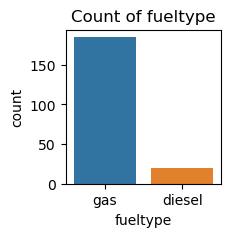

In [8]:
plt.figure(figsize=(2,2))
sns.countplot(df['fueltype'])
plt.title('Count of fueltype')
plt.show()

Gas Fuel type is mostly used than diesel in this dataset.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


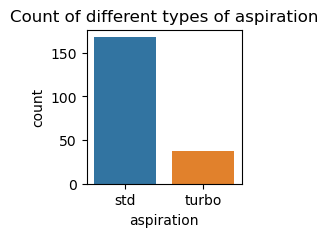

In [9]:
plt.figure(figsize=(2,2))
sns.countplot(df['aspiration'])
plt.title('Count of different types of aspiration')
plt.show()

Standard type of aspiration is used more than the turbo in this dataset.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


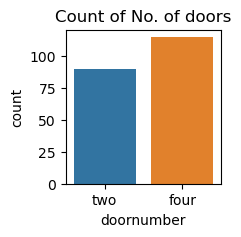

In [10]:
plt.figure(figsize=(2,2))
sns.countplot(df['doornumber'])
plt.title('Count of No. of doors')
plt.show()

Number of doors four is used a lot in this dataset.

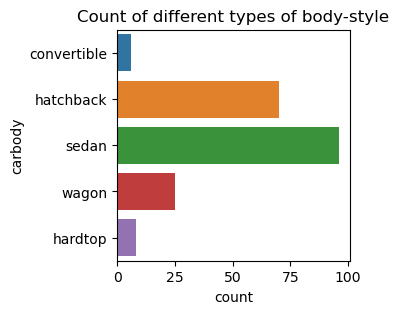

In [11]:
plt.figure(figsize=(3,3))
sns.countplot(y=df['carbody'])
plt.title('Count of different types of body-style')
plt.show()

Sedan and hatchback body style is used more compared to the other styles. Convertible is the least used.

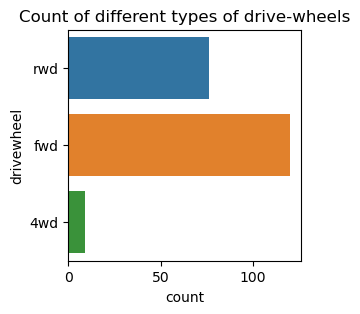

In [12]:
plt.figure(figsize=(3,3))
sns.countplot(y=df['drivewheel'])
plt.title('Count of different types of drive-wheels')
plt.show()

fwd is the most used drive wheels type and the 4wd is the less used one compared to rwd and fwd.

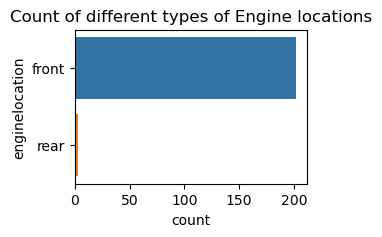

In [13]:
plt.figure(figsize=(3,2))
sns.countplot(y=df['enginelocation'])
plt.title('Count of different types of Engine locations')
plt.show()

Engine located in the front seems to be seen nearly 99% in this dataset.

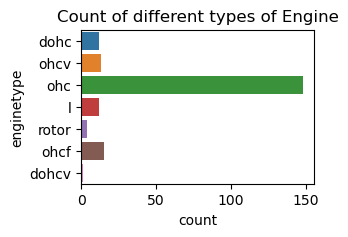

In [14]:
plt.figure(figsize=(3,2))
sns.countplot(y=df['enginetype'])
plt.title('Count of different types of Engine')
plt.show()

ohc types of engine is used most widely in this dataset compared to the other ones. And rotor is the least used.

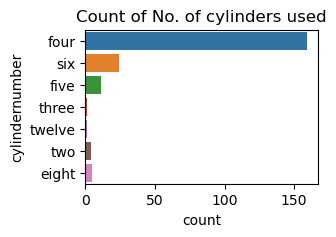

In [15]:
plt.figure(figsize=(3,2))
sns.countplot(y=df['cylindernumber'])
plt.title('Count of No. of cylinders used')
plt.show()

Four cylinders has the maximum count of car designed and the three and twelve seems to be negligible.

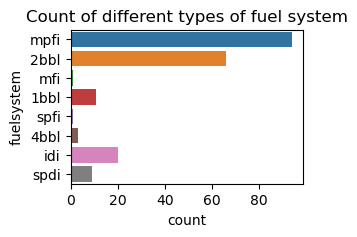

In [16]:
plt.figure(figsize=(3,2))
sns.countplot(y=df['fuelsystem'])
plt.title('Count of different types of fuel system')
plt.show()

mpfi fuel system is mostly used in this dataset and mfi, spfi seems to be negligible.

## Bivariate Analysis of Categorical variables:

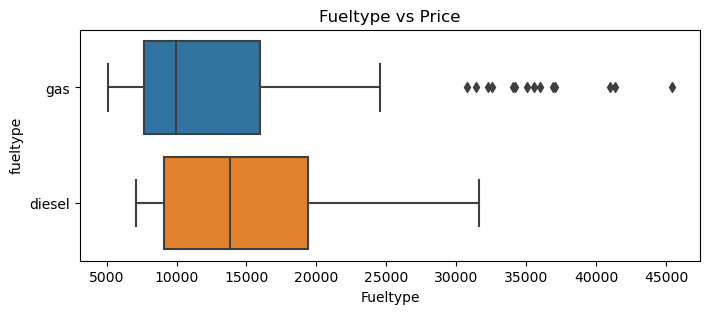

In [17]:
plt.figure(figsize=(8,3))
sns.boxplot(x='price',y='fueltype',data=df)
plt.title('Fueltype vs Price')
plt.xlabel('Fueltype')
plt.show()

Diesel fueltype cars are comparatively expensive than the cars with fueltype as gas.

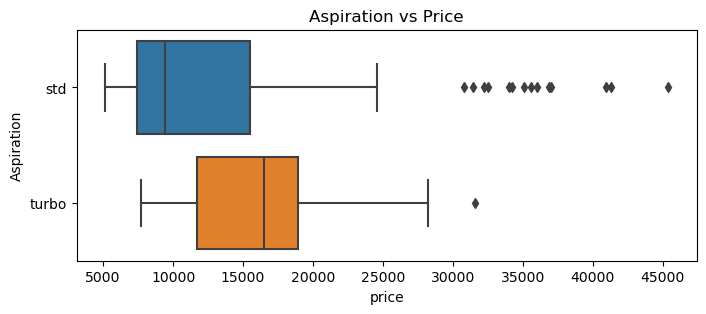

In [18]:
plt.figure(figsize=(8,3))
sns.boxplot(x='price',y='aspiration',data=df)
plt.title('Aspiration vs Price')
plt.ylabel('Aspiration')
plt.show()

Turbo aspiration cars are comparatively expensive than the cars with std aspiration.

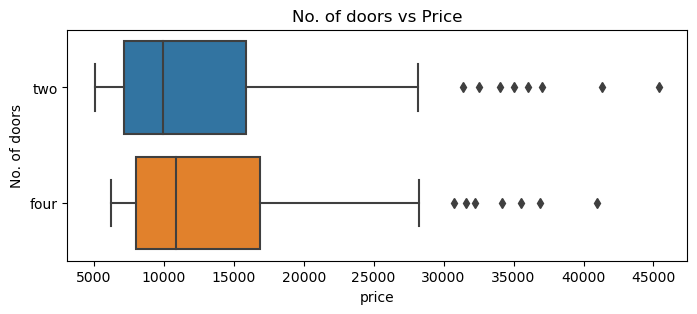

In [19]:
plt.figure(figsize=(8,3))
sns.boxplot(x='price',y='doornumber',data=df)
plt.title('No. of doors vs Price')
plt.ylabel('No. of doors')
plt.show()

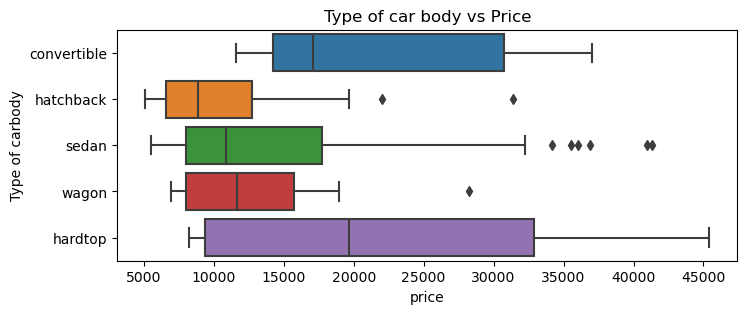

In [20]:

plt.figure(figsize=(8,3))
sns.boxplot(x='price',y='carbody',data=df)
plt.title('Type of car body vs Price')
plt.ylabel('Type of carbody')
plt.show()

Car body of all other types is relatively cheaper compared to convertible and hardtop carbody.

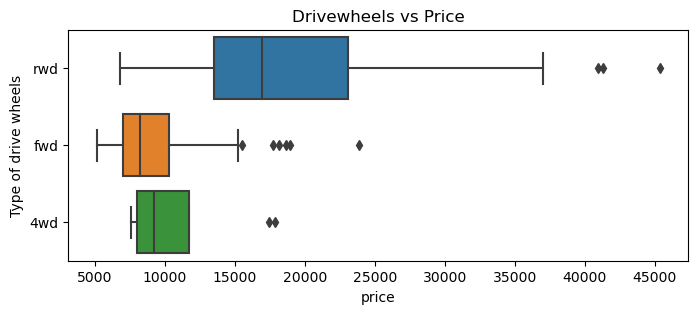

In [21]:
plt.figure(figsize=(8,3))
sns.boxplot(x='price',y='drivewheel',data=df)
plt.title('Drivewheels vs Price')
plt.ylabel('Type of drive wheels')
plt.show()

rwd drive wheel car price is much higher compared to the other two types. 

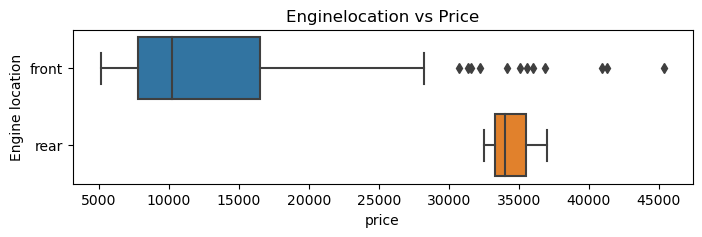

In [22]:
plt.figure(figsize=(8,2))
sns.boxplot(x='price',y='enginelocation',data=df)
plt.title('Enginelocation vs Price')
plt.ylabel('Engine location')
plt.show()

The cars with rear engine location seems to be most expensive than the front engine location.

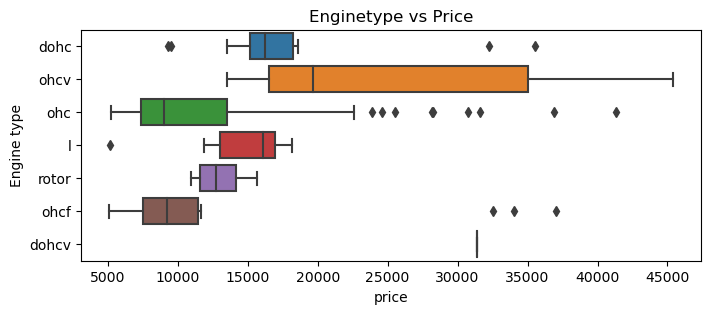

In [23]:
plt.figure(figsize=(8,3))
sns.boxplot(x='price',y='enginetype',data=df)
plt.title('Enginetype vs Price')
plt.ylabel('Engine type')
plt.show()

Of all the engine types, ohcv engine is the most expensive one.

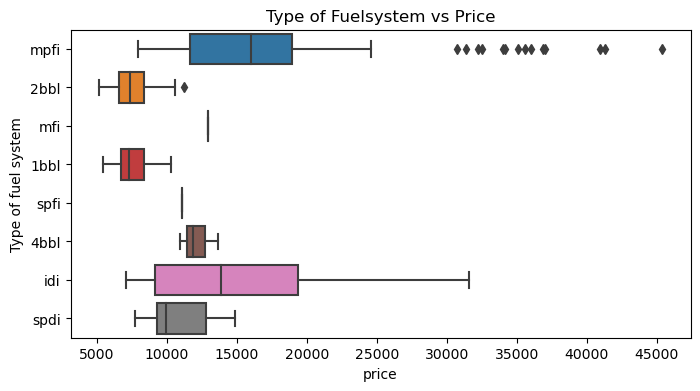

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(x='price',y='fuelsystem',data=df)
plt.title('Type of Fuelsystem vs Price')
plt.ylabel('Type of fuel system')
plt.show()

mpfi and idi type of fuel system is the relatively expensive fuel system compared to the others.

# Visual Analysis on Numerical Features

In [25]:
corr_numcol=df[Numerical_columns].corr()

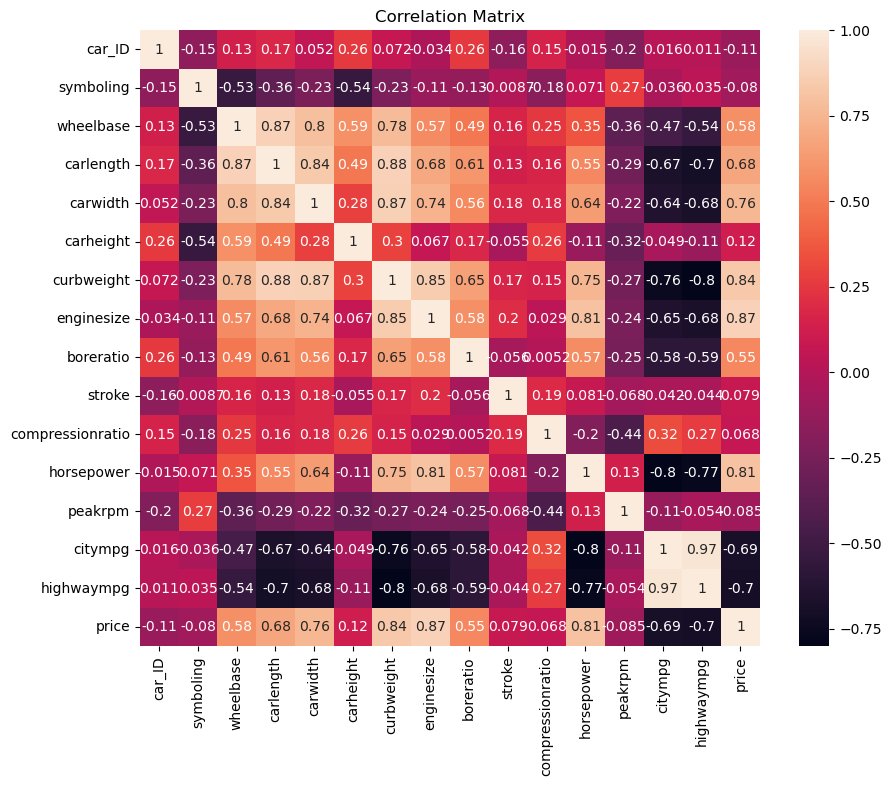

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_numcol,annot=True)
plt.title('Correlation Matrix')
plt.show()

carlength,carwidth,curbweight,enginesize,horsepower seems to have positive correlation with price.

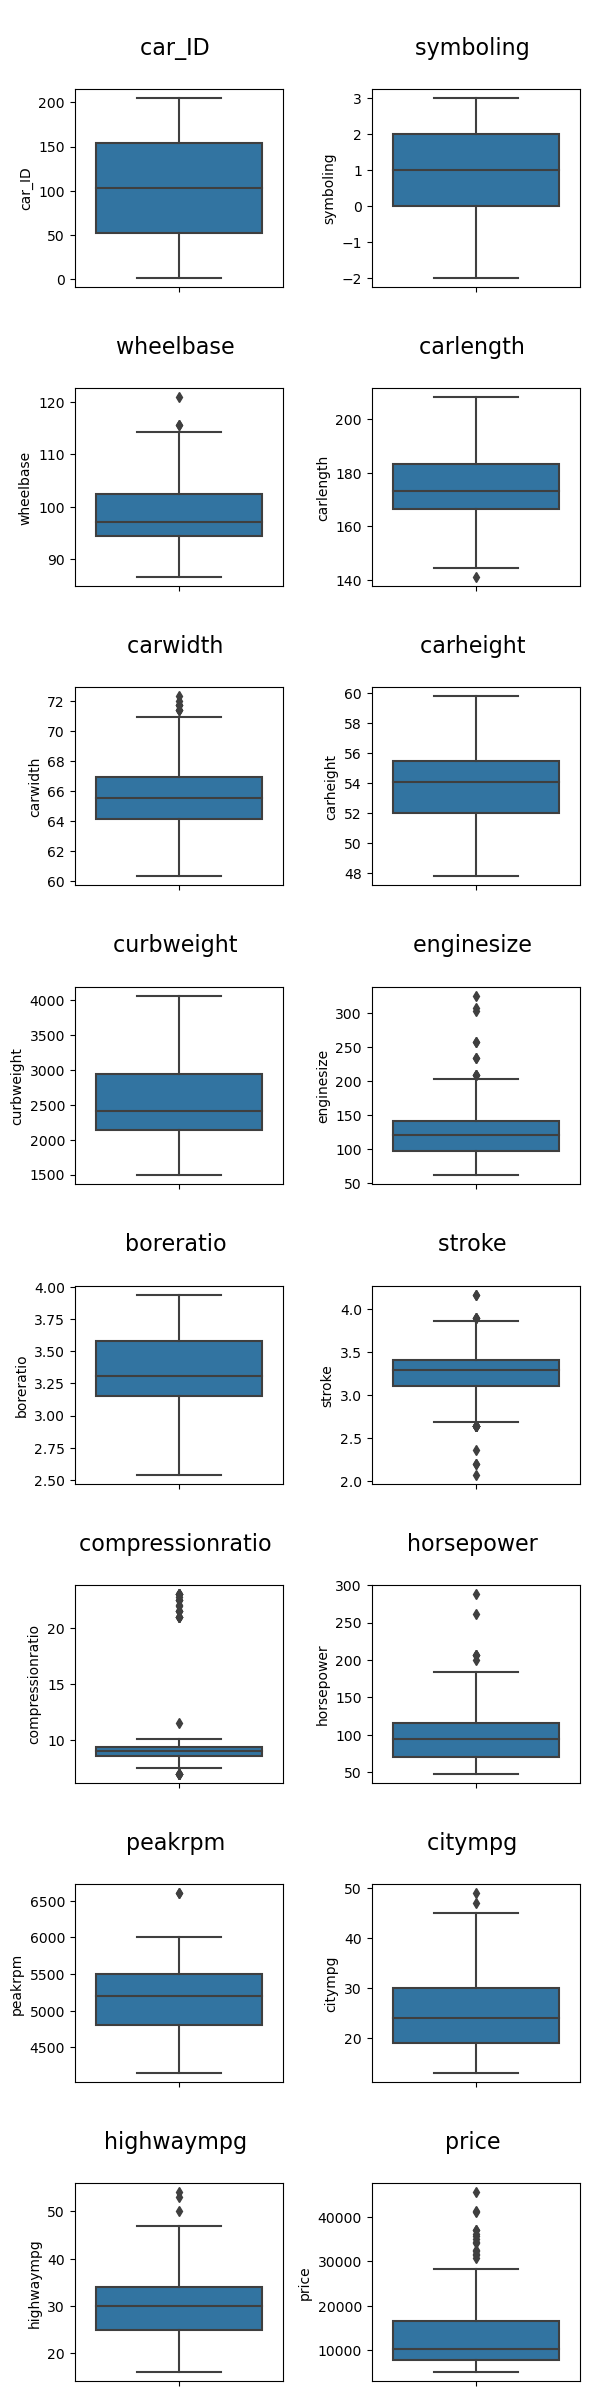

In [27]:
plt.figure(figsize=(6,30))
count=1
for col in range(0,len(Numerical_columns)):
    ax=plt.subplot(10,2,count)
    sns.boxplot(y=Numerical_columns[col],data=df,ax=ax)
    plt.title(f'\n{Numerical_columns[col]} \n',fontsize=16)
    count +=1
plt.tight_layout()
plt.show()

     It seems that 'wheel-base','width',engine-size','compression-ratio','city-mpg','highway-mpg' columns has outliers.

# Detection and Preprocessing  of null values:

In [28]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [29]:
for col in df[Categorical_columns]:
    print('Col Name: ',col)
    print(df[col].value_counts())
    print('   ')


Col Name:  CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
   
Col Name:  fueltype
gas       185
diesel     20
Name: fueltype, dtype: int64
   
Col Name:  aspiration
std      168
turbo     37
Name: aspiration, dtype: int64
   
Col Name:  doornumber
four    115
two      90
Name: doornumber, dtype: int64
   
Col Name:  carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
   
Col Name:  drivewheel
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
   
Col Name:  enginelocation
front    202
rear       3
Name: enginelocation, dtype: int64
   
Col Name:  enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l        

In [30]:
df.drop('CarName',axis='columns',inplace=True)

*****No null values or other indiscriminate values found in the categorical columns.

In [31]:
dummies=pd.get_dummies(df[['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']],drop_first=True)
dummies.head()

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
df1=pd.concat([df,dummies],axis='columns')
df1.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,1,0,0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


In [33]:
df1.drop(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],axis='columns',inplace=True)
df1.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


# Splitting X and Y:

In [34]:
X=df1.drop('price',axis='columns')
X.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [35]:
X.shape

(205, 44)

In [36]:
y=df1['price']

In [37]:
y.shape

(205,)

## Feature Scaling:

In [38]:
scale_col=['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X[scale_col]=scaler.fit_transform(X[scale_col])
X.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.000000,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0,0,0,0,0,0,0,1,0,0
1,0.004902,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0,0,0,0,0,0,0,1,0,0
2,0.009804,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,...,0,0,0,0,0,0,0,1,0,0
3,0.014706,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0
4,0.019608,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0


# Splitting into train and test samples:

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
X_train.shape

(164, 44)

In [41]:
X_test.shape

(41, 44)

# Modelling: Linear Regression

In [42]:
lin_mod=LinearRegression()
lin_mod.fit(X_train,y_train)
y_pred=lin_mod.predict(X_test)

# Evaluation:

## R2 score:

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8781649838248136

## Mean Absolute Error:

In [44]:
def mean_absolute_error(y_test,y_pred):
    return np.mean(np.abs((y_test-y_pred)/y_test))*100

In [45]:
print("Mean Absolute Percentage Error: ",round(mean_absolute_error(y_test,y_pred)),2)

Mean Absolute Percentage Error:  13 2


# RFECV: Recursive Feature Elimination Cross Validation

In [46]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
rfecv= RFECV(estimator=LinearRegression(), min_features_to_select=5,step=5,n_jobs=-1,scoring='r2',cv=5)
rfecv.fit(X_train,y_train)

RFECV(cv=5, estimator=LinearRegression(), min_features_to_select=5, n_jobs=-1,
      scoring='r2', step=5)

In [47]:
X_train.columns[rfecv.support_]

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [48]:
len(X_train.columns[rfecv.support_])

44

In [49]:
len(X_train.columns)

44

In [50]:
X_train.loc[:,rfecv.support_]

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
4,0.019608,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0
71,0.348039,0.2,0.845481,0.917910,0.950000,0.725000,0.873545,0.652830,0.657143,0.490476,...,0,0,0,0,0,0,0,1,0,0
134,0.656863,1.0,0.364431,0.679104,0.516667,0.691667,0.472847,0.226415,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
145,0.710784,0.4,0.303207,0.461194,0.425000,0.541667,0.396431,0.177358,0.771429,0.271429,...,0,0,0,0,0,0,0,1,0,0
122,0.598039,0.6,0.206997,0.391045,0.291667,0.250000,0.272692,0.139623,0.307143,0.552381,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.328431,0.2,0.682216,0.743284,0.833333,0.725000,0.786268,0.460377,0.742857,0.747619,...,0,0,0,0,0,1,0,0,0,0
192,0.941176,0.4,0.402332,0.583582,0.550000,0.608333,0.423196,0.135849,0.335714,0.633333,...,0,0,0,0,0,1,0,0,0,0
117,0.573529,0.4,0.623907,0.680597,0.666667,0.683333,0.636928,0.275472,0.764286,0.542857,...,0,0,0,0,0,0,0,1,0,0
47,0.230392,0.4,0.769679,0.873134,0.775000,0.416667,1.000000,0.743396,0.778571,1.000000,...,0,0,0,0,0,0,0,1,0,0


In [51]:
X_train_rfecv=X_train.loc[:,rfecv.support_]

In [52]:
X_test_rfecv=X_test.loc[:,rfecv.support_]

In [53]:
lin_mod=LinearRegression()
lin_mod.fit(X_train_rfecv,y_train)
y_pred=lin_mod.predict(X_test_rfecv)


# Evaluation:

## R2 score:

In [54]:
r2_score(y_test,y_pred)

0.8781649838248136

## Mean Absolute Error:

In [55]:
def mean_absolute_percentage_error(y_test,y_pred):
    return np.mean(np.abs((y_test-y_pred)/y_test))*100

In [56]:
print(round(mean_absolute_percentage_error(y_test,y_pred)),2)

13 2


# Conclusion:

Using RFECV, achieved 87% R2 score by Linear Regression Modelling.